In [ ]:
%matplotlib inline

# Introduction to Deep Learning with Keras and TensorFlow

**Daniel Moser (UT Southwestern Medical Center)**

**Resources: [Xavier Snelgrove](https://github.com/wxs/keras-mnist-tutorial), [Yash Katariya](https://github.com/yashk2810/MNIST-Keras)**

To help you understand the fundamentals of deep learning, this demo will walk through the basic steps of building two toy models for classifying handwritten numbers with accuracies surpassing 95%. The first model will be a basic fully-connected neural network, and the second model will be a deeper network that introduces the concepts of convolution and pooling.

## The Task for the AI

Our goal is to construct and train an artificial neural network on thousands of images of handwritten digits so that it may successfully identify others when presented. The data that will be incorporated is the MNIST database which contains 60,000 images for training and 10,000 test images. We will use the Keras Python API with TensorFlow as the backend.

<img src="https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/mnist.png?raw=1" >

## Prerequisite Python Modules

First, some software needs to be loaded into the Python environment.

In [ ]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from tensorflow.keras.datasets import mnist     # MNIST dataset is included in Keras
from tensorflow.keras.models import Sequential  # Model type to be used

from tensorflow.keras.layers import Dense, Dropout, Activation # Types of layers to be used in our model
from tensorflow.keras.utils import to_categorical as np_utils # NumPy related tools

## Loading Training Data

The MNIST dataset is conveniently bundled within Keras, and we can easily analyze some of its features in Python.

In [ ]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# Providing the Binary Level Conversion

# 0–4 -> class 0
# 5–9 -> class 1

y_train = (y_train >= 5).astype(int)
y_test  = (y_test  >= 5).astype(int)

In [ ]:
# Processing the Data


X_train = X_train.reshape(60000, 784).astype('float32') / 255
X_test  = X_test.reshape(10000, 784).astype('float32') / 255

# Binary one-hot encoding (2 outputs)
nb_classes = 2
Y_train = np_utils(y_train, nb_classes)
Y_test  = np_utils(y_test, nb_classes)

In [ ]:
# Model Definition

model = Sequential()

# Hidden Layer 1
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Hidden Layer 2
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Output Layer (2 nodes)
model.add(Dense(2))
model.add(Activation('sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Providing the Summary

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │         1,026 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_23 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 665,602 (2.54 MB)

 Trainable params: 665,602 (2.54 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compiling the Solution

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [ ]:
# Training

model.fit(
    X_train, Y_train,
    batch_size=128,
    epochs=5,
    verbose=1
)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9099 - loss: 0.2172
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9790 - loss: 0.0610
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9854 - loss: 0.0453
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9881 - loss: 0.0328
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9890 - loss: 0.0310


In [ ]:
# Evaluation

score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9802 - loss: 0.0578
Test score: 0.05064857006072998
Test accuracy: 0.9830999970436096


In [ ]:
# Imports

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization

In [ ]:
# Reload Data

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Binary labels again
y_train = (y_train >= 5).astype(int)
y_test  = (y_test  >= 5).astype(int)


In [ ]:
# Now to Reshape and Normalize

X_train = X_train.reshape(60000, 28, 28, 1).astype('float32') / 255
X_test  = X_test.reshape(10000, 28, 28, 1).astype('float32') / 255

# One-hot (2 classes)
nb_classes = 2
Y_train = np_utils(y_train, nb_classes)
Y_test  = np_utils(y_test, nb_classes)

In [ ]:
# Specify the Model Definition

model = Sequential()

# Conv Layer 1
model.add(Conv2D(32, (3,3), input_shape=(28,28,1)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

# Conv Layer 2
model.add(Conv2D(32, (3,3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Conv Layer 3
model.add(Conv2D(64, (3,3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

# Conv Layer 4
model.add(Conv2D(64, (3,3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Fully Connected
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Output Layer (2 nodes)
model.add(Dense(2))
model.add(Activation('sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# The Summary

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_24 (Activation)      │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_25 (Activation)      │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_26 (Activation)      │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_27 (Activation)      │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_28 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │         1,026 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_29 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 593,634 (2.26 MB)

 Trainable params: 592,226 (2.26 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [ ]:
# The Compilation

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [ ]:
#Data Augmentation

gen = ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.08,
    shear_range=0.3,
    height_shift_range=0.08,
    zoom_range=0.08
)

test_gen = ImageDataGenerator()

train_generator = gen.flow(X_train, Y_train, batch_size=128)
test_generator  = test_gen.flow(X_test, Y_test, batch_size=128)


In [ ]:
# Training

model.fit(
    train_generator,
    steps_per_epoch=60000 // 128,
    epochs=5,
    verbose=1,
    validation_data=test_generator,
    validation_steps=10000 // 128
)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


468/468 ━━━━━━━━━━━━━━━━━━━━ 174s 363ms/step - accuracy: 0.9295 - loss: 0.1712 - val_accuracy: 0.9826 - val_loss: 0.0520
Epoch 2/5
  1/468 ━━━━━━━━━━━━━━━━━━━━ 2:19 300ms/step - accuracy: 0.9922 - loss: 0.0212

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


468/468 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9922 - loss: 0.0212 - val_accuracy: 0.9803 - val_loss: 0.0572
Epoch 3/5
468/468 ━━━━━━━━━━━━━━━━━━━━ 168s 360ms/step - accuracy: 0.9851 - loss: 0.0435 - val_accuracy: 0.9892 - val_loss: 0.0272
Epoch 4/5
468/468 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 1.0000 - loss: 0.0119 - val_accuracy: 0.9896 - val_loss: 0.0261
Epoch 5/5
468/468 ━━━━━━━━━━━━━━━━━━━━ 197s 371ms/step - accuracy: 0.9895 - loss: 0.0325 - val_accuracy: 0.9870 - val_loss: 0.0357


In [ ]:
# Evalution

score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9844 - loss: 0.0427
Test score: 0.03566655144095421
Test accuracy: 0.9869999885559082


Test score:  0.0357
Test Accuracy:  0.987

Loss score [0] is 0.0357 means binary entropy loss is very low close to zero.
This indicates that the predicted probalilities from the network are very close to the true binary labels.

Accuracy score [1] is 0.987.
The model correctly presicted 98.7% of the test samples. This is excellent performance for a binary clsasifier.

Compared to the multiclass (10) outputs: Test Accuracy  = 0.9872 ~ 98.7% and Test loss = 0.0407
For binary classification here, the accuracy is essentially the same but the loss is slightly lower because predicting two classes is easier than 10 classes.



Using matplotlib, we can plot some sample images from the training set directly into this Jupyter Notebook.

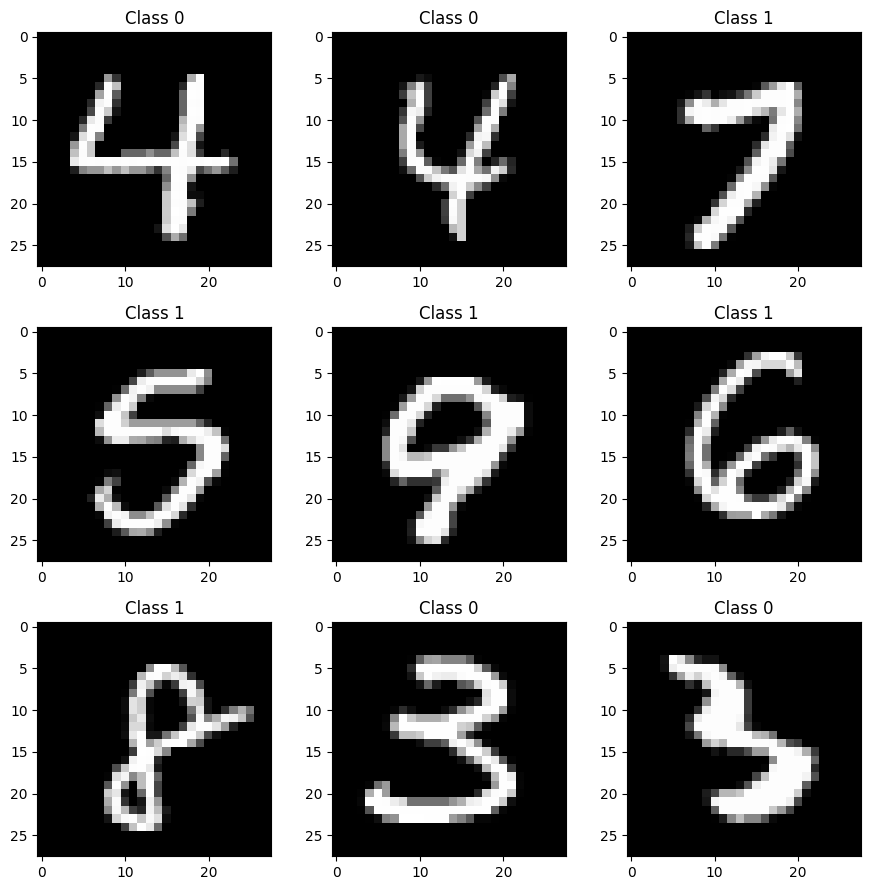

In [ ]:
plt.rcParams['figure.figsize'] = (9,9)  # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3, 3, i + 1)
    num = random.randint(0, X_train.shape[0] - 1)

    # reshape back to 28x28 for visualization
    plt.imshow(X_train[num].reshape(28, 28), cmap='gray', interpolation='none')

    # binary class label
    plt.title("Class {}".format(y_train[num]))

plt.tight_layout()


Let's examine a single digit a little closer, and print out the array representing the last digit.

In [ ]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for row in mat:
        for i, val in enumerate(row):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(val), end="  ")
        print("")

# =======================
# PRINT A TRAINING IMAGE
# =======================

# choose a random training example
num = random.randint(0, X_train.shape[0] - 1)

# reshape flattened image back to 28x28 before printing
image_matrix = X_train[num].reshape(28, 28)

# pretty print the matrix
matprint(image_matrix)

# optional: print binary class label
print("\nClass:", y_train[num])


0  0  0  0         0  0          0          0          0         0          0          0          0          0           0          0          0         0         0          0          0         0         0          0  0  0  0  0  
0  0  0  0         0  0          0          0          0         0          0          0          0          0           0          0          0         0         0          0          0         0         0          0  0  0  0  0  
0  0  0  0         0  0          0          0          0         0          0          0          0          0           0          0          0         0         0          0          0         0         0          0  0  0  0  0  
0  0  0  0         0  0          0          0          0  0.537255   0.996078   0.141176          0          0           0          0          0         0         0          0          0         0         0          0  0  0  0  0  
0  0  0  0         0  0          0          0  0.0235294  0.780392   0.9

Each pixel is an 8-bit integer from 0-255. 0 is full black, while 255 is full white. This what we call a single-channel pixel. It's called monochrome.

*Fun-fact! Your computer screen has three channels for each pixel: red, green, blue. Each of these channels also likely takes an 8-bit integer. 3 channels -- 24 bits total -- 16,777,216 possible colors!*

## Formatting the input data layer

Instead of a 28 x 28 matrix, we build our network to accept a 784-length vector.

Each image needs to be then reshaped (or flattened) into a vector. We'll also normalize the inputs to be in the range [0-1] rather than [0-255]. Normalizing inputs is generally recommended, so that any additional dimensions (for other network architectures) are of the same scale.

<img src='https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/flatten.png?raw=1' >

In [ ]:
# reshape images into vectors
X_train = X_train.reshape(60000, 784)
X_test  = X_test.reshape(10000, 784)

# convert to float
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')

# normalize pixel values
X_train /= 255
X_test  /= 255

print("Training matrix shape:", X_train.shape)
print("Testing matrix shape:", X_test.shape)


Training matrix shape: (60000, 784)
Testing matrix shape: (10000, 784)


We then modify our classes (unique digits) to be in the one-hot format, i.e.

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

If the final output of our network is very close to one of these classes, then it is most likely that class. For example, if the final output is:

```
[0, 0.94, 0, 0, 0, 0, 0.06, 0, 0]
```
then it is most probable that the image is that of the digit `1`.

In [ ]:
# number of binary classes
nb_classes = 2

# convert labels to one-hot binary format
Y_train = np_utils(y_train, nb_classes)
Y_test  = np_utils(y_test, nb_classes)

**Building** a 3-layer fully connected network (FCN)

**Below is the 3-layer fully connected network (FCN) - 10 Layer Output.**

# Building a 3-layer fully connected network (FCN)

<img src="https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/figure.png?raw=1" />

**Below is the 3-layer fully connected network (FCN) - 2 Layer Output.**

/tmp/ipython-input-2494854090.py:60: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


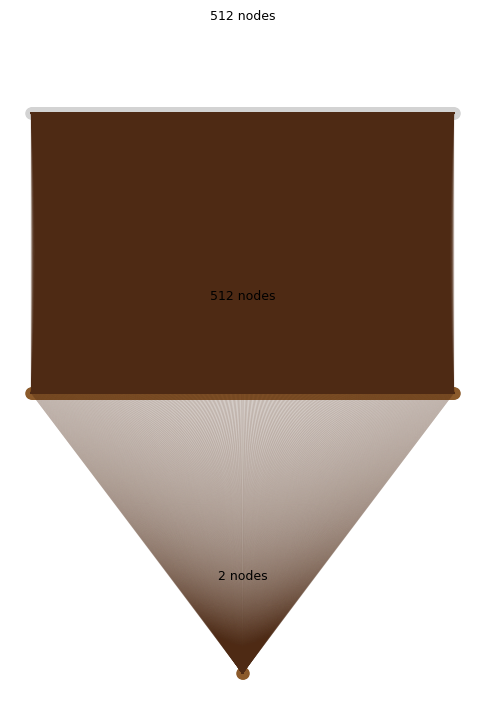

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def draw_nn_vertical(layer_sizes):
    fig, ax = plt.subplots(figsize=(6, 8))
    ax.axis("off")

    # Color definitions
    light_gray = "#d3d3d3"
    brown = "#8b5a2b"
    dark_brown = "#4e2a14"

    # Vertical spacing between layers
    y_spacing = 1.2
    x_spacing = 1.0

    # Store node positions
    layers = []

    for i, size in enumerate(layer_sizes):
        y = -i * y_spacing   # top → bottom
        x = np.linspace(
            - (size - 1) / 2 * x_spacing,
              (size - 1) / 2 * x_spacing,
              size
        )
        layers.append([(xi, y) for xi in x])

        # Choose node color
        if i == 0:
            node_color = light_gray      # input layer
        else:
            node_color = brown           # hidden + output layers

        # Draw nodes
        for xi in x:
            ax.plot(xi, y, "o", color=node_color, markersize=8)

        # Label layer size
        ax.text(
            0,
            y + 0.4,
            f"{size} nodes",
            ha="center",
            fontsize=9
        )

    # Draw connections
    for i in range(len(layers) - 1):
        for (x1, y1) in layers[i]:
            for (x2, y2) in layers[i + 1]:
                ax.plot(
                    [x1, x2],
                    [y1, y2],
                    color=dark_brown,
                    linewidth=0.3,
                    alpha=0.3
                )

    plt.tight_layout()
    plt.show()

# ---- NETWORK DEFINITION ----
# Top to bottom:
# Input: 512
# Hidden: 512
# Output: 2
draw_nn_vertical([512, 512, 2])

## Evaluate Model's Accuracy on Test Data

In [ ]:
# Evaluation

# Reload MNIST data to ensure correct state for CNN evaluation
(_, _), (X_test_raw, y_test_raw) = mnist.load_data()

# Apply binary classification logic to y_test
y_test_binary = (y_test_raw >= 5).astype(int)

# Reshape X_test for CNN input: (num_samples, height, width, channels)
X_test_cnn_shape = X_test_raw.reshape(X_test_raw.shape[0], 28, 28, 1).astype('float32') / 255

# One-hot encode y_test_binary for 2 classes
nb_classes_eval = 2
Y_test_one_hot = np_utils(y_test_binary, nb_classes_eval)

# Evaluate the model with the correctly shaped and encoded test data
score = model.evaluate(X_test_cnn_shape, Y_test_one_hot)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9844 - loss: 0.0427
Test score: 0.03566655144095421
Test accuracy: 0.9869999885559082


### Inspecting the output

It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [ ]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
# Using np.argmax to get predicted classes from probabilities
predicted_classes = np.argmax(model.predict(X_test_cnn_shape), axis=-1)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test_binary)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test_binary)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


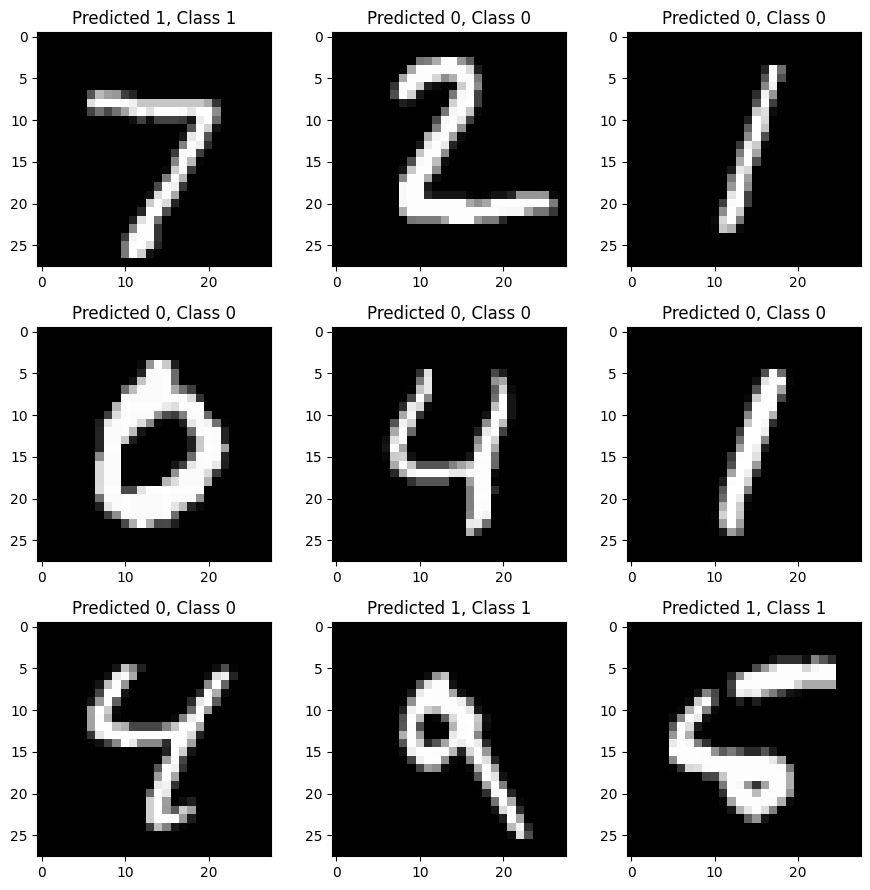

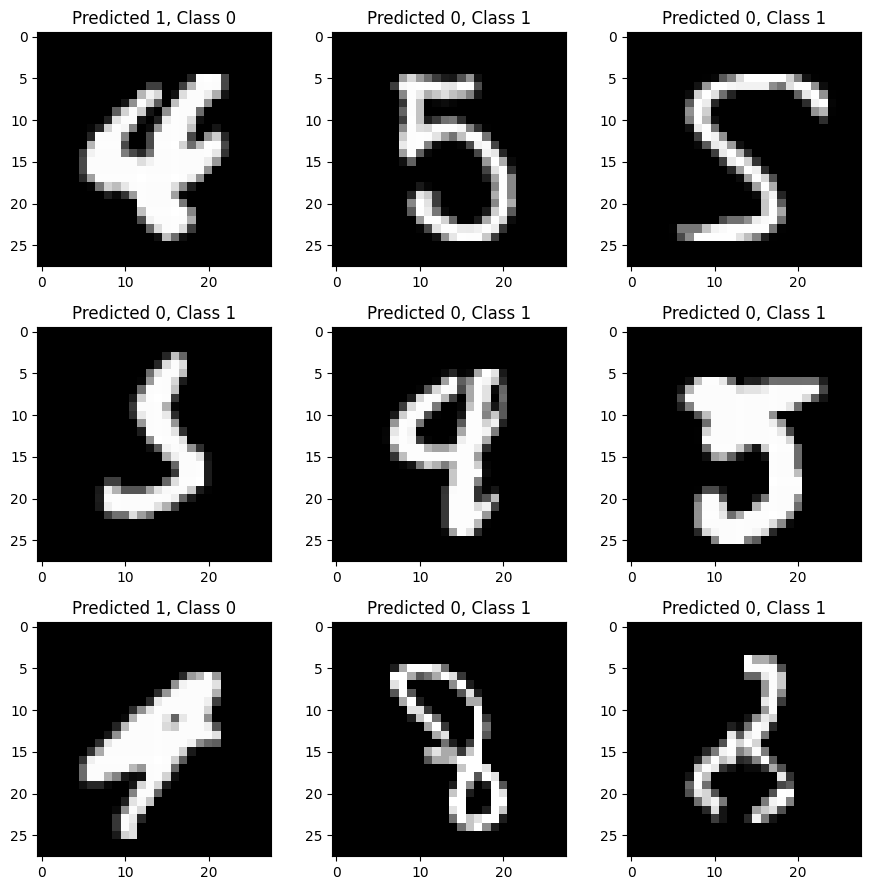

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

plt.tight_layout()

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

plt.tight_layout()

# Trying experimenting with the batch size!

#### How does increasing the batch size to 10,000 affect the training time and test accuracy?

#### How about a batch size of 32?

# Introducing Convolution! What is it?

Before, we built a network that accepts the normalized pixel values of each value and operates soley on those values. What if we could instead feed different features (e.g. **curvature, edges**) of each image into a network, and have the network learn which features are important for classifying an image?

This possible through convolution! Convolution applies **kernels** (filters) that traverse through each image and generate **feature maps**.

<img src = 'convolution.gif' >

In the above example, the image is a 5 x 5 matrix and the kernel going over it is a 3 x 3 matrix. A dot product operation takes place between the image and the kernel and the convolved feature is generated. Each kernel in a CNN learns a different characteristic of an image.

Kernels are often used in photoediting software to apply blurring, edge detection, sharpening, etc.

<img src = 'kernels.png' >

Kernels in deep learning networks are used in similar ways, i.e. highlighting some feature. Combined with a system called **max pooling**, the non-highlighted elements are discarded from each feature map, leaving only the features of interest, reducing the number of learned parameters, and decreasing the computational cost (e.g. system memory).

<img src = 'max_pooling.png' >

We can also take convolutions of convolutions -- we can stack as many convolutions as we want, as long as there are enough pixels to fit a kernel.

*Warning: What you may find down there in those deep convolutions may not appear recognizable to you.*

<img src = 'go_deeper.jpg' >

## Building a "Deep" Convolutional Neural Network

In [ ]:
# import some additional tools

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten, BatchNormalization

In [ ]:
# Reload the MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# Again, do some formatting
# Except we do not flatten each image into a 784-length vector because we want to perform convolutions first

X_train = X_train.reshape(60000, 28, 28, 1) #add an additional dimension to represent the single-channel
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')         # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                              # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [ ]:
Dense(1, activation='sigmoid')


<Dense name=dense_14, built=False>

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
model = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer01 = Activation('relu')                     # activation
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer03 = Activation('relu')                     # activation
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())                                 # Flatten final 4x4x64 output matrix into a 1024-length vector

# Fully Connected Layer 5
model.add(Dense(512))                                # 512 FCN nodes
model.add(BatchNormalization())                      # normalization
model.add(Activation('relu'))                        # activation

# Fully Connected Layer 6
model.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model.add(Dense(10))                                 # final 10 FCN nodes for 10 classes
model.add(Activation('softmax'))                     # softmax activation for multi-class classification

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_30 (Activation)      │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_31 (Activation)      │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_32 (Activation)      │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_33 (Activation)      │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_34 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 2)              │         1,026 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_35 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 593,634 (2.26 MB)

 Trainable params: 592,226 (2.26 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [ ]:
# we'll use the same optimizer

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# data augmentation prevents overfitting by slightly changing the data randomly
# Keras has a great built-in feature to do automatic augmentation

gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [ ]:
# We can then feed our augmented data in batches
# Besides loss function considerations as before, this method actually results in significant memory savings
# because we are actually LOADING the data into the network in batches before processing each batch

# Before the data was all loaded into memory, but then processed in batches.

train_generator = gen.flow(X_train, Y_train, batch_size=128)
test_generator = test_gen.flow(X_test, Y_test, batch_size=128)

In [ ]:
# We can now train our model which is fed data by our batch loader
# Steps per epoch should always be total size of the set divided by the batch size

# SIGNIFICANT MEMORY SAVINGS (important for larger, deeper networks)

model.fit(train_generator, steps_per_epoch=60000//128, epochs=5, verbose=1,
                    validation_data=test_generator, validation_steps=10000//128)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


468/468 ━━━━━━━━━━━━━━━━━━━━ 179s 375ms/step - accuracy: 0.9879 - loss: 0.0336 - val_accuracy: 0.9898 - val_loss: 0.0073
Epoch 2/5
  1/468 ━━━━━━━━━━━━━━━━━━━━ 2:12 284ms/step - accuracy: 1.0000 - loss: 0.0059

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


468/468 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 1.0000 - loss: 0.0059 - val_accuracy: 0.9908 - val_loss: 0.0068
Epoch 3/5
468/468 ━━━━━━━━━━━━━━━━━━━━ 175s 373ms/step - accuracy: 0.9899 - loss: 0.0074 - val_accuracy: 0.9926 - val_loss: 0.0050
Epoch 4/5
468/468 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9844 - loss: 0.0085 - val_accuracy: 0.9927 - val_loss: 0.0051
Epoch 5/5
468/468 ━━━━━━━━━━━━━━━━━━━━ 202s 395ms/step - accuracy: 0.9916 - loss: 0.0059 - val_accuracy: 0.9901 - val_loss: 0.0065


In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9890 - loss: 0.0070
Test score: 0.006534615997225046
Test accuracy: 0.9901000261306763


**GREAT RESULTS!**

In [ ]:
# But wouldn't it be nice if we could visualize those convolutions so that we can see what the model is seeing?

In [ ]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model # Import Model for functional API

# choose any image to want by specifying the index
img = X_test[3]
img = np.expand_dims(img, axis=0) # Keras requires the image to be in 4D, so we add an extra dimension to it.

# Not important to understand how this function work -- It just plots a convolution layer

def visualize(layer):
    # Create a new model that takes the original model's input
    # and outputs the desired intermediate layer's output.
    # This approach handles layers like Dropout and BatchNormalization correctly for inference.
    activation_model = Model(inputs=model.inputs, outputs=layer.output)

    # Predict the activations for the input image
    activations = activation_model.predict(img, verbose=0)

    convolutions = np.squeeze(activations)

    print ('Shape of conv:', convolutions.shape)

    m = convolutions.shape[2]
    n = int(np.ceil(np.sqrt(m)))

    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(15,12))
    for i in range(m):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(convolutions[:,:,i], cmap='gray')

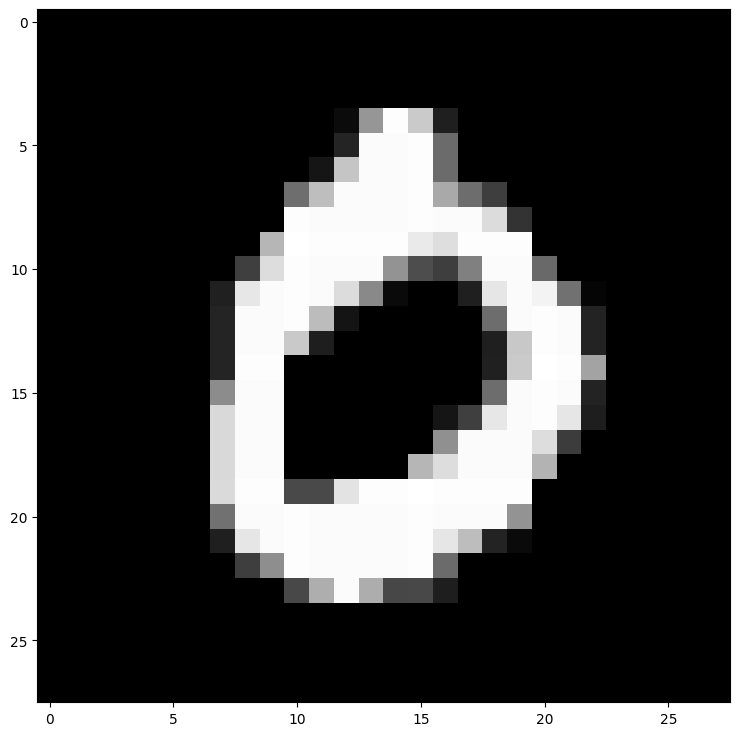

In [ ]:
plt.figure()
plt.imshow(X_test[3].reshape(28,28), cmap='gray', interpolation='none')

Shape of conv: (26, 26, 32)


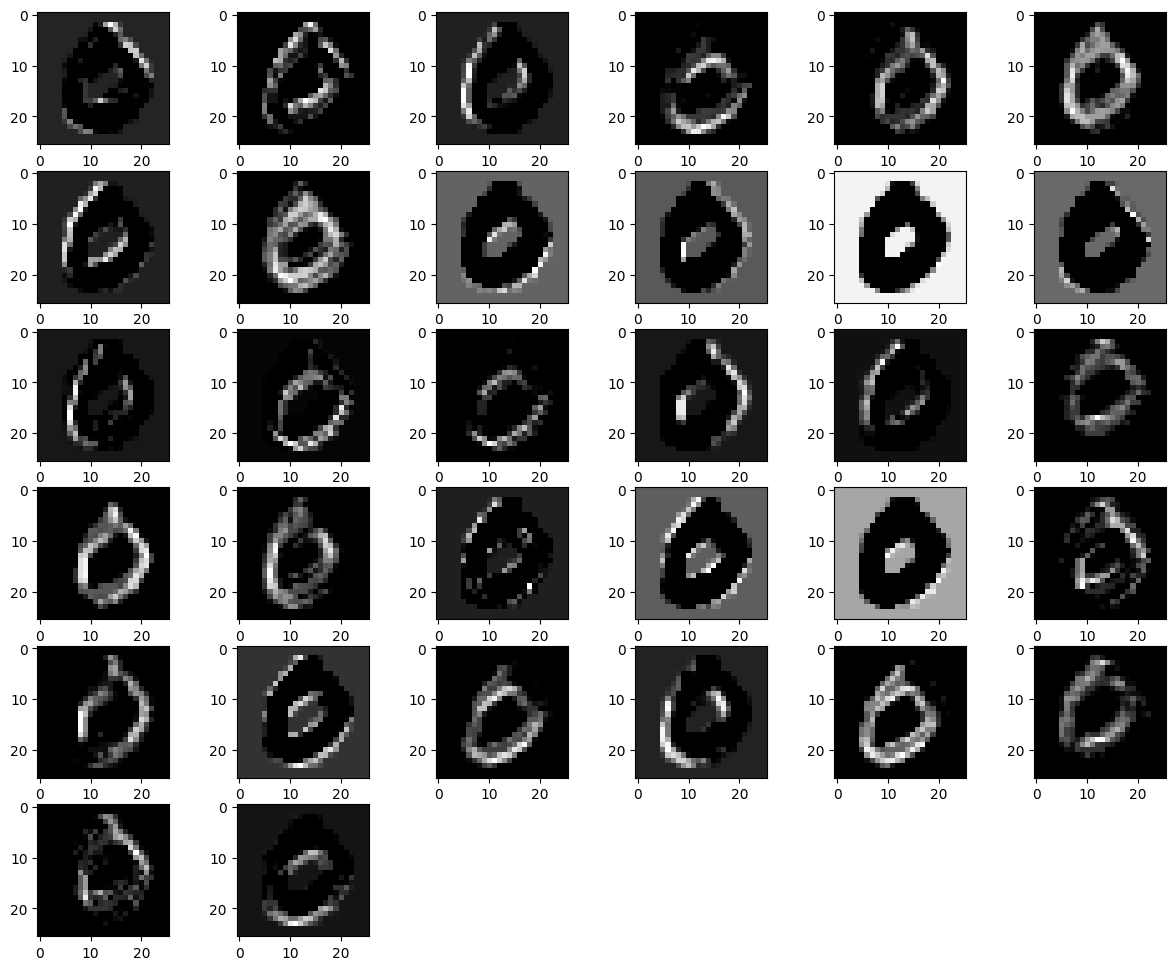

In [ ]:
visualize(convLayer01) # visualize first set of feature maps

Shape of conv: (12, 12, 32)


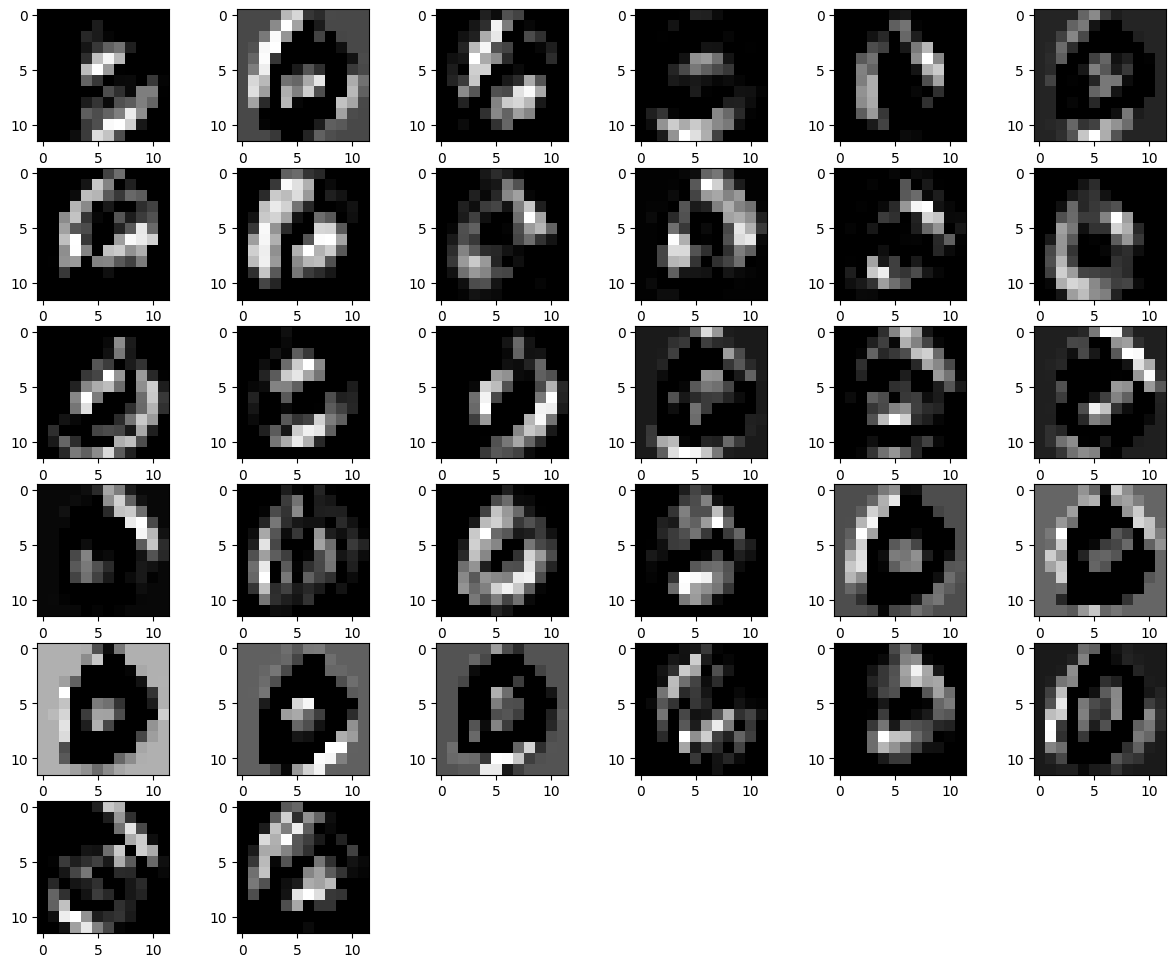

In [ ]:
visualize(convLayer02) # visualize second set of feature maps

Shape of conv: (10, 10, 64)


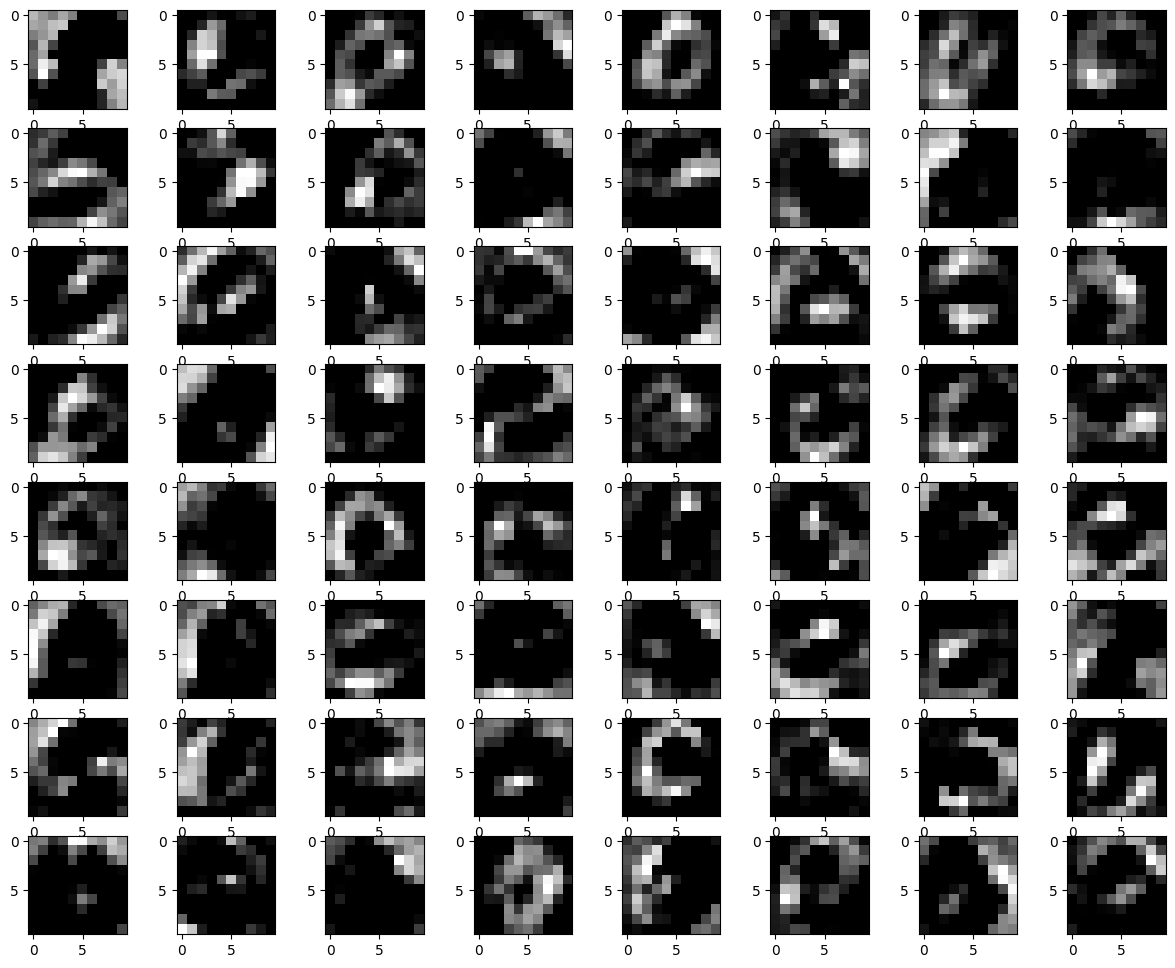

In [ ]:
visualize(convLayer03)# visualize third set of feature maps

Shape of conv: (4, 4, 64)


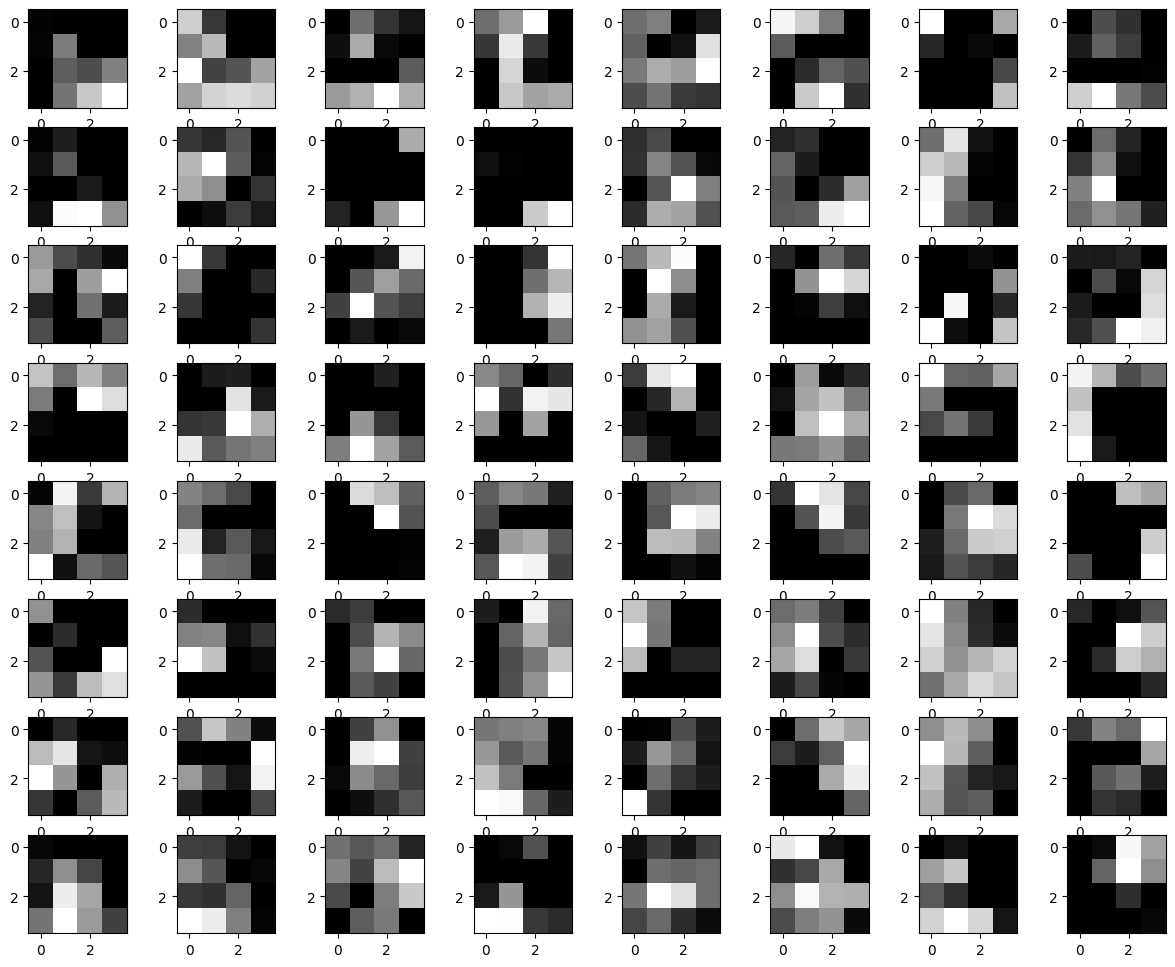

In [ ]:
visualize(convLayer04)# visualize fourth set of feature maps

#### For a 3D visualization of a very similar network, visit http://scs.ryerson.ca/~aharley/vis/conv/

**Summary**

Data Analysis Key Findings

The nb_classes variable was successfully updated from 10 to 2, correctly
configuring
the target variables for a binary classification problem.
Y_train and Y_test were re-encoded into a 2-class one-hot format, preparing
them for binary classification with a two-neuron output layer.
The CNN model’s output layer was redefined to Dense(2) with sigmoid activation,
enabling the model to produce binary class probabilities.
The model was compiled using binary_crossentropy as the loss function, adam as
the optimizer, and accuracy as the evaluation metric—appropriate settings for binary
classification.
The model.summary() confirmed that the final dense layer has an output shape of
(None, 2) , verifying the correct binary configuration.